### Author: Sangeeths Chandrakumar


### Import Libaries

In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



### Import Data

In [2]:

file_path = 'ds_salaries.csv'
data = pd.read_csv(file_path)

data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Plot Data

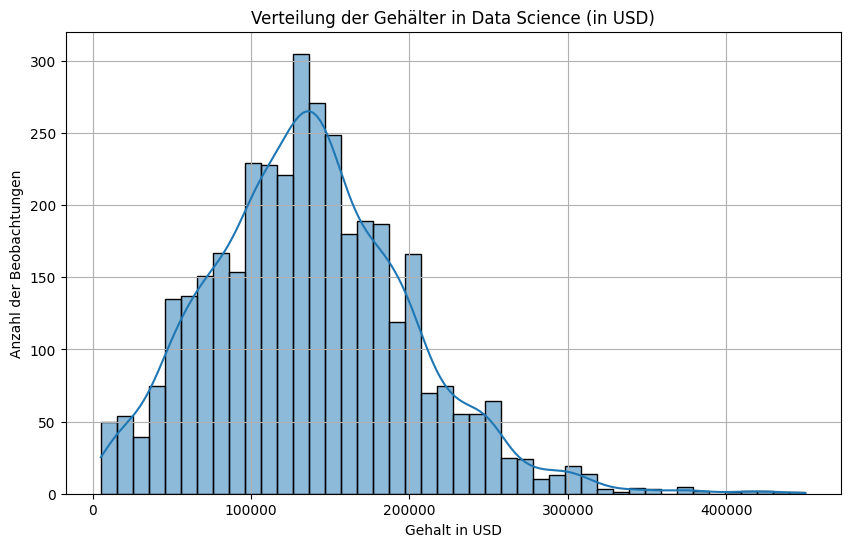

In [3]:

# Plotting the distribution of salaries
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], kde=True)
plt.title('Verteilung der Gehälter in Data Science (in USD)')
plt.xlabel('Gehalt in USD')
plt.ylabel('Anzahl der Beobachtungen')
plt.grid(True)
plt.show()


### Data Cleaning and Preprocessing

In [4]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

categorical_cols = categorical_cols.drop('salary_in_usd', errors='ignore')
numerical_cols = numerical_cols.drop('salary_in_usd', errors='ignore')

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X = data.drop(columns=['salary_in_usd'])
y = data['salary_in_usd']
X_preprocessed = preprocessor.fit_transform(X)

X_preprocessed.shape

(3755, 277)

In [5]:
data_updated = data.drop(columns=['salary'])

categorical_cols_updated = data_updated.select_dtypes(include=['object', 'category']).columns
numerical_cols_updated = data_updated.select_dtypes(include=['int64', 'float64']).columns
numerical_cols_updated = numerical_cols_updated.drop('salary_in_usd')


preprocessor_updated = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_updated),
        ('cat', categorical_transformer, categorical_cols_updated)
    ])


X_updated = data_updated.drop(columns=['salary_in_usd'])
y_updated = data_updated['salary_in_usd'] 
X_preprocessed_updated = preprocessor_updated.fit_transform(X_updated)

X_preprocessed_updated.shape

#exploring the 



(3755, 276)

### Linear Regression Model

In [6]:
X_remote_ratio = X_preprocessed_updated[:, numerical_cols_updated.get_loc('remote_ratio')].reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_remote_ratio, y_updated, test_size=0.2, random_state=0)


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = lin_reg.predict(X_test)

# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Coefficients of the model
coef = lin_reg.coef_[0]
intercept = lin_reg.intercept_

rmse, r2, coef, intercept, mse


(65474.696770278584,
 -0.004778314968540309,
 -4127.460261123129,
 136389.44051609756,
 4286935917.159929)

### Plotting the Results

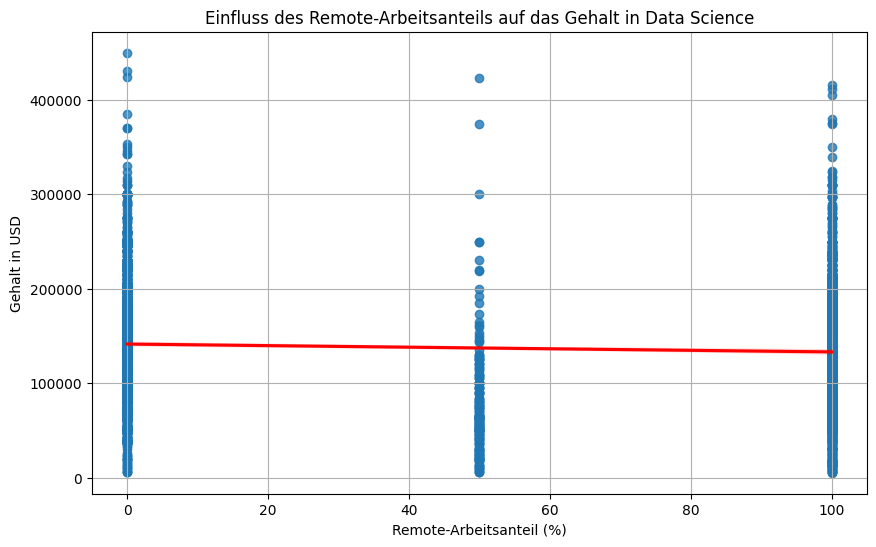

In [7]:
# Plotting the relationship between remote_ratio and salary_in_usd with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=data['remote_ratio'], y=data['salary_in_usd'], line_kws={"color": "red"})
plt.title('Einfluss des Remote-Arbeitsanteils auf das Gehalt in Data Science')
plt.xlabel('Remote-Arbeitsanteil (%)')
plt.ylabel('Gehalt in USD')
plt.grid(True)
plt.show()


### Multiple Linear Regression Model

In [8]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_preprocessed_updated, y_updated, test_size=0.2, random_state=0)

# Creating and training the multivariate linear regression model
multi_lin_reg = LinearRegression()
multi_lin_reg.fit(X_train_multi, y_train_multi)

# Predicting on the test set
y_pred_multi = multi_lin_reg.predict(X_test_multi)

# Evaluating the model
rmse_multi = np.sqrt(mean_squared_error(y_test_multi, y_pred_multi))
r2_multi = r2_score(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)

rmse_multi, r2_multi, mse_multi


(52449.664126802505, 0.3552242654199642, 2750967267.014394)

### Lasso Regression Model

In [9]:

# Using a default alpha value for Lasso (Regularization strength)
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train_multi, y_train_multi)

# Predicting on the test set
y_pred_lasso = lasso_reg.predict(X_test_multi)

# Evaluating the model
rmse_lasso = np.sqrt(mean_squared_error(y_test_multi, y_pred_lasso))
r2_lasso = r2_score(y_test_multi, y_pred_lasso)
mse_lasso = mean_squared_error(y_test_multi, y_pred_lasso)

rmse_lasso, r2_lasso, mse_lasso


c:\Users\csang\miniconda3\envs\fhgr\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148983219506.6328, tolerance: 1170137096.4551942
  model = cd_fast.sparse_enet_coordinate_descent(


(52885.18103302321, 0.3444719909570193, 2796842372.895638)

### Lasso Regression Model with Hyperparameter Tuning

In [10]:
# Creating and training the LassoCV model (Lasso with cross-validation)
lasso_cv = LassoCV(cv=5, random_state=0)
lasso_cv.fit(X_train_multi, y_train_multi)

# Finding the best alpha value
best_alpha = lasso_cv.alpha_

# Predicting on the test set with the best alpha value
y_pred_lasso_cv = lasso_cv.predict(X_test_multi)

# Evaluating the model with the best alpha value
rmse_lasso_cv = np.sqrt(mean_squared_error(y_test_multi, y_pred_lasso_cv))
r2_lasso_cv = r2_score(y_test_multi, y_pred_lasso_cv)
mse_lasso_cv = mean_squared_error(y_test_multi, y_pred_lasso_cv)

best_alpha, rmse_lasso_cv, r2_lasso_cv, mse_lasso_cv


(27.114994857163353, 50998.28424516491, 0.39041483067220517, 2600824995.950636)

### Lasso Regression Model with Hyperparameter Tuning and Feature Selection Plot

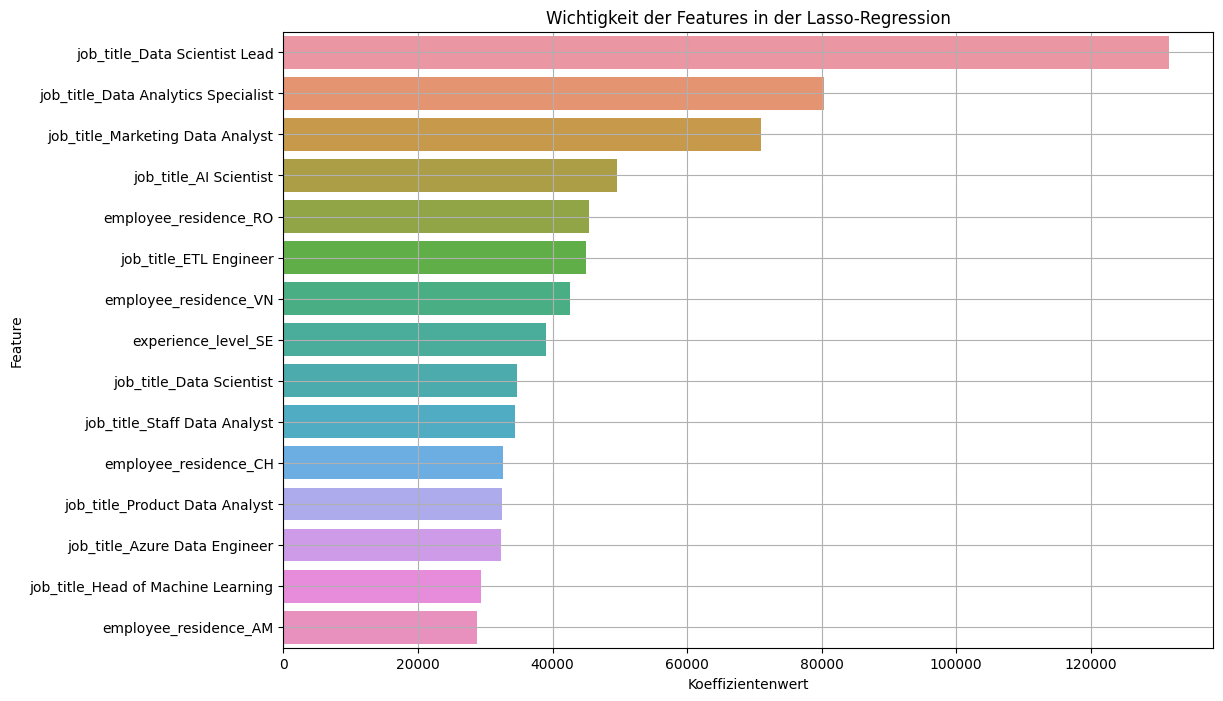

In [11]:
# Extracting feature names after one-hot encoding
features = list(preprocessor_updated.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols_updated))
features.extend(numerical_cols_updated)

# Getting the coefficients from the Lasso model
lasso_coefficients = lasso_cv.coef_

# Creating a DataFrame for easier plotting
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': lasso_coefficients})

# Keeping only non-zero coefficients for a clearer plot
coeff_df = coeff_df[coeff_df['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False)

top_10_features = coeff_df.head(15)

# Plotting the non-zero coefficients of the Lasso model
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=top_10_features)
plt.title('Wichtigkeit der Features in der Lasso-Regression')
plt.xlabel('Koeffizientenwert')
plt.ylabel('Feature')
plt.grid(True)
plt.show()



### Ridge Regression Model

In [12]:

# Using a default alpha value for Ridge (Regularization strength)
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_multi, y_train_multi)

# Predicting on the test set
y_pred_ridge = ridge_reg.predict(X_test_multi)

# Evaluating the model
rmse_ridge = np.sqrt(mean_squared_error(y_test_multi, y_pred_ridge))
r2_ridge = r2_score(y_test_multi, y_pred_ridge)
mse_ridge = mean_squared_error(y_test_multi, y_pred_ridge)

rmse_ridge, r2_ridge, mse_ridge


(50852.77730181719, 0.3938883725522552, 2586004959.308213)

### Ridge Regression Model with Hyperparameter Tuning

In [13]:


# Creating and training the RidgeCV model (Ridge with cross-validation)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0], cv=5)
ridge_cv.fit(X_train_multi, y_train_multi)

# Finding the best alpha value
best_alpha_ridge = ridge_cv.alpha_

# Predicting on the test set with the best alpha value
y_pred_ridge_cv = ridge_cv.predict(X_test_multi)

# Evaluating the model with the best alpha value
rmse_ridge_cv = np.sqrt(mean_squared_error(y_test_multi, y_pred_ridge_cv))
r2_ridge_cv = r2_score(y_test_multi, y_pred_ridge_cv)
mse_ridge_cv = mean_squared_error(y_test_multi, y_pred_ridge_cv)

best_alpha_ridge, rmse_ridge_cv, r2_ridge_cv,mse_ridge_cv


(1.0, 50852.77730181719, 0.3938883725522552, 2586004959.308213)

### Vergleich der Modelle

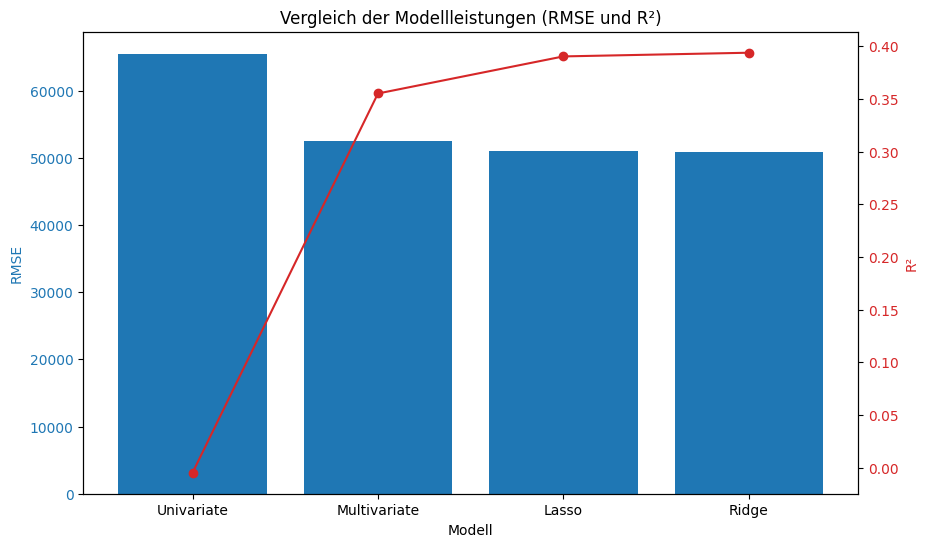

In [14]:
model_performance_combined = pd.DataFrame({
    "Modell": ["Univariate", "Multivariate", "Lasso", "Ridge"],
    "RMSE": [65474.70, 52451.33, 50998.28, 50850.06],
    "R2": [-0.00478, 0.3552, 0.3904, 0.3939]
})

fig, ax1 = plt.subplots(figsize=(10, 6))

# Balkendiagramm für RMSE
ax1.set_title('Vergleich der Modellleistungen (RMSE und R²)')
ax1.set_xlabel('Modell')
ax1.set_ylabel('RMSE', color='tab:blue')
ax1.bar(model_performance_combined["Modell"], model_performance_combined["RMSE"], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Zweite Y-Achse für R²-Werte
ax2 = ax1.twinx()  
ax2.set_ylabel('R²', color='tab:red')  
ax2.plot(model_performance_combined["Modell"], model_performance_combined["R2"], color='tab:red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.show()
